In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
for dirname, _, filenames in os.walk('./'):
        print(os.path.join(dirname))

./
./.ipynb_checkpoints
./test
./test\Audi
./test\Hyundai Creta
./test\Mahindra Scorpio
./test\Rolls Royce
./test\Swift
./test\Tata Safari
./test\Toyota Innova
./Test_Plots
./train
./train\Audi
./train\Hyundai Creta
./train\Mahindra Scorpio
./train\Rolls Royce
./train\Swift
./train\Tata Safari
./train\Toyota Innova


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        './train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [5]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.82745105 0.854902   0.8941177 ]
  [0.82745105 0.854902   0.8935989 ]
  [0.82789916 0.85535014 0.8862746 ]
  ...
  [0.9058824  0.87843144 0.854902  ]
  [0.9058824  0.87843144 0.854902  ]
  [0.9058824  0.87843144 0.854902  ]]

 [[0.82745105 0.8546716  0.89434814]
  [0.82745105 0.854902   0.8941177 ]
  [0.82745105 0.854902   0.88687664]
  ...
  [0.9058824  0.87843144 0.854902  ]
  [0.9058824  0.87843144 0.854902  ]
  [0.9061418  0.87791264 0.8536051 ]]

 [[0.82745105 0.8541464  0.89487326]
  [0.82745105 0.854902   0.8941177 ]
  [0.82745105 0.854902   0.88792694]
  ...
  [0.9089778  0.87224066 0.83942515]
  [0.9095029  0.87119037 0.83679944]
  [0.909804   0.8705883  0.8352942 ]]

 ...

 [[0.10733856 0.06924324 0.03462134]
  [0.11430429 0.07388436 0.03859024]
  [0.13583483 0.09331434 0.05802023]
  ...
  [0.6060043  0.51890355 0.3762841 ]
  [0.66083527 0.5706392  0.4388876 ]
  [0.47537252 0.38517645 0.25968623]]

 [[0.25211    0.19824561 0.16295148]
  [0.27656367 0.22086449 0.18530463]


In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        './test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [12]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7866238  0.8172979  0.854902  ]
  [0.7859165  0.8212106  0.85650474]
  [0.78823537 0.8235295  0.8588236 ]
  ...
  [0.24555807 0.31222475 0.33967572]
  [0.24424036 0.31090704 0.338358  ]
  [0.24292265 0.30958933 0.3370403 ]]

 [[0.7868873  0.81703436 0.854902  ]
  [0.7856529  0.820947   0.8562411 ]
  [0.78823537 0.8235295  0.8588236 ]
  ...
  [0.23137257 0.29803923 0.3254902 ]
  [0.23137257 0.29803923 0.3254902 ]
  [0.23137257 0.29803923 0.3254902 ]]

 [[0.78715086 0.8167708  0.854902  ]
  [0.78538936 0.8206835  0.8559776 ]
  [0.78823537 0.8235295  0.8588236 ]
  ...
  [0.23350604 0.29803923 0.3254902 ]
  [0.23403312 0.29803923 0.3254902 ]
  [0.23456019 0.29803923 0.3254902 ]]

 ...

 [[0.4389638  0.3558769  0.26408702]
  [0.4415992  0.35798526 0.26645887]
  [0.4442346  0.36009356 0.26883075]
  ...
  [0.315859   0.2866199  0.19893327]
  [0.36210692 0.33073437 0.24838144]
  [0.36620668 0.33483413 0.2524812 ]]

 [[0.43171313 0.35471418 0.2621992 ]
  [0.42907774 0.35313293 0.26035443]


In [8]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)
model.save("model_parser.h5")

Epoch 1/50
105/105 [==============================] - 73s 677ms/step - loss: 1.8800 - accuracy: 0.2542 - val_loss: 1.7696 - val_accuracy: 0.3383
Epoch 2/50
105/105 [==============================] - 60s 573ms/step - loss: 1.7576 - accuracy: 0.3288 - val_loss: 1.6841 - val_accuracy: 0.3825
Epoch 3/50
105/105 [==============================] - 65s 617ms/step - loss: 1.6913 - accuracy: 0.3672 - val_loss: 1.6159 - val_accuracy: 0.4059
Epoch 4/50
105/105 [==============================] - 63s 598ms/step - loss: 1.5792 - accuracy: 0.4066 - val_loss: 1.4753 - val_accuracy: 0.4723
Epoch 5/50
105/105 [==============================] - 69s 657ms/step - loss: 1.5024 - accuracy: 0.4445 - val_loss: 1.4148 - val_accuracy: 0.5068
Epoch 6/50
105/105 [==============================] - 69s 652ms/step - loss: 1.3929 - accuracy: 0.4726 - val_loss: 1.3450 - val_accuracy: 0.5055
Epoch 7/50
105/105 [==============================] - 64s 613ms/step - loss: 1.3302 - accuracy: 0.5140 - val_loss: 1.2754 - val_ac

In [12]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 4s 140ms/step - loss: 1.1333 - accuracy: 0.7109


In [13]:
scores

[1.1333180665969849, 0.7109470963478088]

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
type(history.history['loss'])

list

In [16]:
len(history.history['loss'])

50

In [17]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.8800240755081177,
 1.7575905323028564,
 1.6913093328475952,
 1.5791929960250854,
 1.5024491548538208]

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

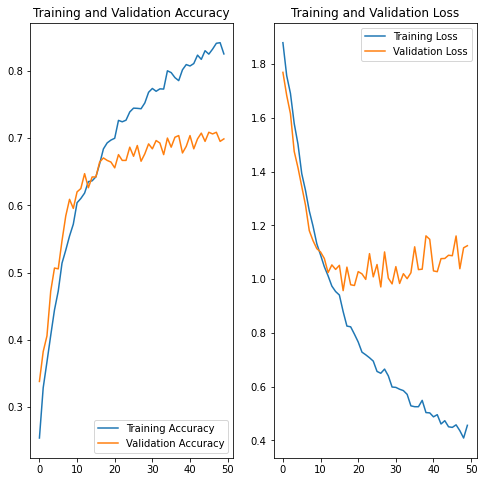

In [20]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


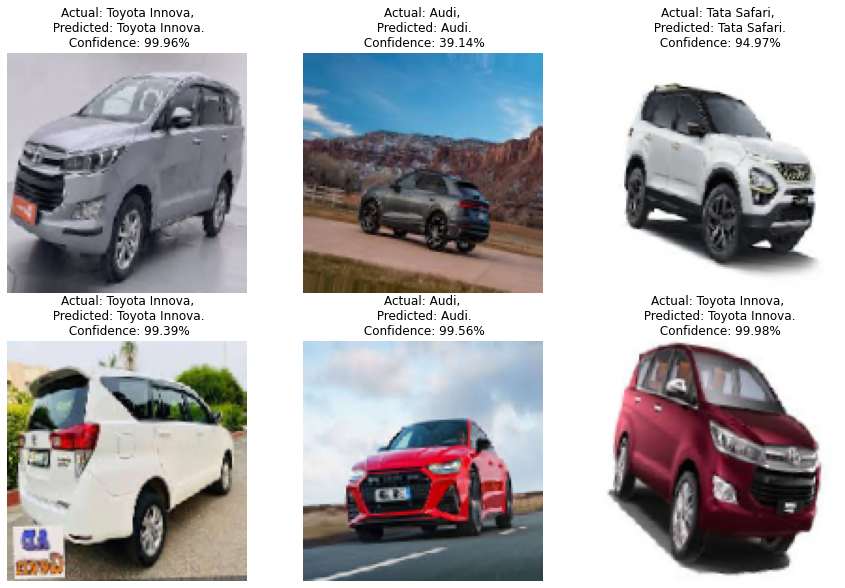

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break